# MA/CS 358: Final Project: Bifid Cipher - Spring 2020
*Please complete this notebook by filling in the code cells as indicated.*

Double-click into this cell, type your name, and run the cell to finalize the changes.

**Name:** -----

## 0. Run The Cell Below Everytime You Log In

To get you started, run the cell below to load the autograder and toolkit for the final project. Every function we've used in the course should be available to you in the toolkit.

In [ ]:
import otter
grader = otter.Notebook('tests')
from final_toolkit import *

# 1. The Polybius Square (14 total points)

This cipher uses a 5x5 square of characters as part of the encryption scheme. The default Polybius square is in the form:

||||||
|---|---|---|---|---|
|A|B|C|D|E|
|F|G|H|I/J|K|
|L|M|N|O|P|
|Q|R|S|T|U|
|V|W|X|Y|Z|

A key could be used to reorder the alphabet in the square, with the letters (without duplicates) of the key being placed at the beginning with the rest of the alphabet following it in regular order. For example, the key phrase `polybius cipher` would lead to the reordered square below.

||||||
|---|---|---|---|---|
|P|O|L|Y|B|
|I/J|U|S|C|H|
|E|R|A|D|F|
|G|K|M|N|Q|
|T|V|W|X|Z|

For this assignment, represent the polybius square using a list of lists. For example, the default and key word polybius squares would be the objects:

In [ ]:
default_square = [ ['A', 'B', 'C', 'D', 'E'],
                   ['F', 'G', 'H', 'I', 'K'],
                   ['L', 'M', 'N', 'O', 'P'],
                   ['Q', 'R', 'S', 'T', 'U'],
                   ['V', 'W', 'X', 'Y', 'Z'] ]

keyword_square = [ ['P', 'O', 'L', 'Y', 'B'],
                   ['I', 'U', 'S', 'C', 'H'],
                   ['E', 'R', 'A', 'D', 'F'],
                   ['G', 'K', 'M', 'N', 'Q'],
                   ['T', 'V', 'W', 'X', 'Z'] ]

These lists will be used in the sample test cases in the problems below.

Note that when creating these objects, only the character `I` was used, not `I/J`. For this assignment, both `I` and `J` should be treated as the character `I`. This will create some odd plaintext messages when deciphering, but humans are good at reading `I`'s as `J`'s when needed. Now stop and give me `10 Iumping Iacks`!

## Part A: Creating the Square (4 pts)

Write a function that creates the list of lists that represents the Polybius Square. It should be capable of taking in a key word to re-order the characters, but if one is not provided it should revert to the default square described above.

**Criteria:**
1. The function must be named `polybius_square_gen` exactly
2. The function must have exactly 1 input arguments:
   * `key` (str, optional): the value for the key word to be used to generate the list of lists. Should default to `'ABCDEFGHIKLMNOPQRSTUVWXYZ'` (notice no `J`)
3. The function must return a `list` object that contains 5 sub-lists, one for each row in the square. Each sublist should contain 5 elements, each a single character string.
4. Any `J`'s included in a keyword should be replaced with `I`'s before creating the square
5. The keyword should be cleaned in case it uses lower-case letters or symbols.

**Sample Test Cases**:
```
>>> polybius_square_gen()
[['A', 'B', 'C', 'D', 'E'], ['F', 'G', 'H', 'I', 'K'], ['L', 'M', 'N', 'O', 'P'], ['Q', 'R', 'S', 'T', 'U'], ['V', 'W', 'X', 'Y', 'Z']]


>>> polybius_square_gen( 'Polybius Cipher' )
[['P', 'O', 'L', 'Y', 'B'], ['I', 'U', 'S', 'C', 'H'], ['E', 'R', 'A', 'D', 'F'], ['G', 'K', 'M', 'N', 'Q'], ['T', 'V', 'W', 'X', 'Z']]

>>> polybius_square_gen( key = 'Long Jump' )
[['L', 'O', 'N', 'G', 'I'], ['U', 'M', 'P', 'A', 'B'], ['C', 'D', 'E', 'F', 'H'], ['K', 'Q', 'R', 'S', 'T'], ['V', 'W', 'X', 'Y', 'Z']]

```

In [ ]:
def polybius_square_gen( key = 'ABCDEFGHIKLMNOPQRSTUVWXYZ'):
    
    square = [[],[],[],[],[]]

    
    return square

In [ ]:
### Running this cell will check your answer for Question 1a
grader.check('final-polybius-1a')

## Part B: Accessing Characters (2 pts)

For this cipher, it will be helpful to be able to provide a row and column number and determine which character is located there. Write a function that takes in the row and column number and returns the character located there. The first row and column should be considered to be row 1 and column 1 respectively.

**Criteria:**
1. The function must be named `polybius_square_character` exactly
2. The function must have exactly 3 input arguments:
   * `square` (list): the list of lists that represents the polybius square
   * `row` (int): the value for the row
   * `col` (int): the value for the column
3. The function must return a `str` object that contains a single character

**Hint:** This should be a _very_ short function. If you're good you can get by with _just_ a return statement! In fact, you almost don't need a function for this, but it's helpful to have a function name that can be called to perform this operation.

**Sample Test Cases**:
```
>>> polybius_square_character( default_square, 1, 2 )
'B'

>>> polybius_square_character( keyword_square, 5, 4 )
'X'
```

In [ ]:
def polybius_square_character( square, row, col ):


In [ ]:
### Running this cell will check your answer for Question 1b
grader.check('final-polybius-1b')

## Part C: Determining Row Number (4 pts)

For this cipher, it will be helpful to know in which row and column a given character can be located. Write a function that takes in a character and returns the row number where it's located.

**Criteria:**
1. The function must be named `polybius_square_row` exactly
2. The function must have exactly 2 input arguments:
   * `square` (list): the list of lists that represents the polybius square
   * `letter` (str): the letter whose row number is being determined
3. The function must return a `int` object that represents the row number

**Hint:** Iterate over the possible row and column numbers for the polybius square and check to see if the current row/column number matches the passed in character. If it is, return the value for the row. If not, keep going. You're guaranteed to find it evenually! Don't forget, the rows in the Polybius square start at 1, while in a list the first element is at index 0.

**Sample Test Cases**:
```
>>> polybius_square_row( default_square, 'A' )
1

>>> polybius_square_row( default_square, 'P' )
3

>>> polybius_square_row( keyword_square, 'A' )
3
```

In [ ]:
def polybius_square_row( square, letter ):


In [ ]:
### Running this cell will check your answer for Question 1c
grader.check('final-polybius-1c')

## Part D: Determining Column Number (4 pts)

For this cipher, it will be helpful to know in which row and column a given character can be located. Write a function that takes in a character and returns the column number where it's located.

**Criteria:**
1. The function must be named `polybius_square_col` exactly
2. The function must have exactly 2 input arguments:
   * `square` (list): the list of lists that represents the polybius square
   * `letter` (str): the letter whose column number is being determined
3. The function must return a `int` object that represents the column number

**Hint:** Iterate over the possible row and column numbers for the polybius square and check to see if the current row/column number matches the passed in character. If it is, return the value for the column. If not, keep going. You're guaranteed to find it evenually! Don't forget, the columns in the Polybius square start at 1, while in a list the first element is at index 0.

**Sample Test Cases**:
```
>>> polybius_square_col( default_square, 'A' )
1

>>> polybius_square_col( default_square, 'P' )
5

>>> polybius_square_col( keyword_square, 'K' )
2
```

In [7]:
def polybius_square_col( square, letter ):
    

In [ ]:
### Running this cell will check your answer for Question 1d
grader.check('final-polybius-1d')

# 2. Coordinate Manipulation (16 total points)

Bifid requires a lot of work with characters and their corresponding coordinates in the Polybius square. There will be 3 main representations that are used that we'll name as follows.

1. Character: 
```
HI
```
2. 2-row vertically oriented coordinates (vertical)
```
H I
5 3
2 1
```
3. 1-row horizontally oriented coordinates (horizontal).
```
53 21
Y  Q
```

All the examples below will use the following Polybius Square:
```
  1 2 3 4 5
1 B G W K Z
2 Q P N D S
3 I O A X E
4 F C L U M
5 T H Y V R
````

## Part A: Letters to Vertical Coordinates (4 pts)
Encrypting with the bifid cipher requires that each character be represented by its row and column number, written as a 2-row vertically oriented coordinate.

For example:

```
plaintext: Flee at once

F L E E A T O N C E
4 4 3 3 3 5 3 2 4 3
1 3 5 5 3 1 2 3 2 5
```

Write a function that does this, where the function returns a list of 2 lists, the first sublist contains the row numbers and the second sublist contains the column numbers.

**Criteria:**
1. The function must be named `bifid_char_to_vertical` exactly
2. The function must have exactly 2 input arguments:
   * `square` (list): the list of lists that represents the polybius square
   * `text` (str): the plaintext that will be converted to 2-row vertical orientation of coordinates
3. The function must return a `list` object that contains two sub-lists. The first sub-list contains integers that represent the row number for each character, and the second sub-list contains integers that represent the column number for each character

**Sample Test Cases**:
```
>>> bifid_char_to_vertical( default_square, 'HEY')
[[2, 1, 5], [3, 5, 4]]

>>> bifid_char_to_vertical( keyword_square, 'HEY')
[[2, 3, 1], [5, 1, 4]]

>>> bifid_char_to_vertical( default_square, 'This is a long message')
[[4, 2, 2, 4, 2, 4, 1, 3, 3, 3, 2, 3, 1, 4, 4, 1, 2, 1],
 [4, 3, 4, 3, 4, 3, 1, 1, 4, 3, 2, 2, 5, 3, 3, 1, 2, 5]]
```

In [ ]:
def bifid_char_to_vertical( square, text ):

    coordinates = [ [], [] ]
    

    
    return coordinates

In [ ]:
### Running this cell will check your answer for Question 2a
grader.check('final-bifid-2a')

## Part B: Vertical Coordinates to Horizontal (2 pts)
Once you have the coordinates for each character written in the 2-row vertical orientation, now you need to create a 1-row horizontal representation of the coordinate values with row numbers first followed by column numbers.

```
F L E E A T O N C E
4 4 3 3 3 5 3 2 4 3
1 3 5 5 3 1 2 3 2 5

becomes

4 4 3 3 3 5 3 2 4 3 1 3 5 5 3 1 2 3 2 5
```

Write a function that transforms the 2-row vertical orientation to the 1-row horizontal orienation, following the rules of the bifid cipher (row numbers first followed by column numbers)

**Criteria:**
1. The function must be named `bifid_vertical_to_horizontal` exactly
2. The function must have exactly 1 input arguments:
   * `vcoordinates` (list): the list of lists that represents the 2-row vertical orientation
3. The function must return a `list` object that contains only integers. The first half of the integers should correspond to the first sub-list in `vcoordinates` (row numbers of plaintext) and the second half of integers should correspond to the second sub-list in `vcoordinates` (column numbers of plaintext)

**Sample Test Cases**:
```
>>> bifid_vertical_to_horizontal( [[2, 1, 5], [3, 5, 4]] )
[2, 1, 5, 3, 5, 4]

>>> bifid_vertical_to_horizontal( [[2, 3, 1], [5, 1, 4]] )
[2, 3, 1, 5, 1, 4]

>>> bifid_vertical_to_horizontal( [[4, 2, 2, 4, 2, 4, 1, 3, 3, 3, 2, 3, 1, 4, 4, 1, 2, 1], [4, 3, 4, 3, 4, 3, 1, 1, 4, 3, 2, 2, 5, 3, 3, 1, 2, 5]] )
[4, 2, 2, 4, 2, 4, 1, 3, 3, 3, 2, 3, 1, 4, 4, 1, 2, 1, 4, 3, 4, 3, 4, 3, 1, 1, 4, 3, 2, 2, 5, 3, 3, 1, 2, 5]
```

In [ ]:
def bifid_vertical_to_horizontal( vcoordinates ):
    

In [ ]:
### Running this cell will check your answer for Question 2b
grader.check('final-bifid-2b')

## Part C: Horizontal Coordinates to Characters (2 pts)
The last part of the encryption process will require to you take the 1-row horizontal orientation of coordinates and convert to characters using the Polybius square. You should take two consecutive values from the 1-row orientation and use them as the row and column values in the Polybius square to determine the character. 

```
4 4 3 3 3 5 3 2 4 3 1 3 5 5 3 1 2 3 2 5

becomes

44 33 35 32 43 13 55 31 23 25
U  A  E  O  L  W  R  I  N  S
```

Write a function that uses the 1-row horizontal orientation of coordinates, takes 2 consecutive integers at a time, and uses them as row and column numbers to determine the ciphertext character according to the Polybius square passed as an input.

**Criteria:**
1. The function must be named `bifid_horizontal_to_char` exactly
2. The function must have exactly 2 input arguments:
   * `square` (list): the list of lists that represents the polybius square
   * `hcoordinates` (list): the list that represents the 1-row horizontal orientation
3. The function must return a `str` object that represents the ciphertext message.

**Sample Test Cases**:
```
>>> bifid_horizontal_to_char( default_square, [2, 1, 5, 3, 5, 4])
'FXY'

>>> bifid_horizontal_to_char( keyword_square, [2, 3, 1, 5, 1, 4])
'SBY'

>>> bifid_horizontal_to_char( default_square, [4, 2, 2, 4, 2, 4, 1, 3, 3, 3, 2, 3, 1, 4, 4, 1, 2, 1, 4, 3, 4, 3, 4, 3, 1, 1, 4, 3, 2, 2, 5, 3, 3, 1, 2, 5])
'RIICNHDQFSSSASGXLK'
```

In [ ]:
def bifid_horizontal_to_char(square, hcoordinates ):
    

In [ ]:
### Running this cell will check your answer for Question 2c
grader.check('final-bifid-2c')

## Part D: Characters to Horizontal (2 pts)
As part of the decryption process you will need to convert ciphertext characters back into coordinates. Since decryption occurs in the opposite order as encryption, these characters should be written out horiztonally in a single row of values. In the next step these characters will be coverted back into the 2-row vertical orientation.

```
Ciphertext: UAEOL WRINS

becomes:

4 4 3 3 3 5 3 2 4 3 1 3 5 5 3 1 2 3 2 5

```

Write a function convert ciphertext characters back into coordinates.

**Criteria:**
1. The function must be named `bifid_char_to_horizontal` exactly
2. The function must have exactly 2 input arguments:
   * `square` (list): the list of lists that represents the polybius square
   * `text` (str): the ciphertext that will be converted to 1-row horizontal orientation of coordinates
3. The function must return a `list` object that contains only integers. The list should contain the row and column numbers for each character in the ciphertext. The integers should alternate row, column, row, column, ... based on the ciphertext characters.


**Sample Test Cases**:
```
>>> bifid_char_to_horizontal( default_square, 'FXY')
[2, 1, 5, 3, 5, 4]

>>> bifid_char_to_horizontal( keyword_square, 'SBY')
[2, 3, 1, 5, 1, 4]

>>> bifid_char_to_horizontal( default_square, 'RIICNHDQFSSSASGXLK')
[4, 2, 2, 4, 2, 4, 1, 3, 3, 3, 2, 3, 1, 4, 4, 1, 2, 1, 4, 3, 4, 3, 4, 3, 1, 1, 4, 3, 2, 2, 5, 3, 3, 1, 2, 5]
```

In [ ]:
def bifid_char_to_horizontal( square, text ):
    

In [ ]:
### Running this cell will check your answer for Question 2d
grader.check('final-bifid-2d')

## Part E: Horizontal to Vertical (4 pts)
As part of the decryption process you will need to convert the 1-row horizontal representation of coordinates to the 2-row vertical representation of coordinates.

```
4 4 3 3 3 5 3 2 4 3 1 3 5 5 3 1 2 3 2 5

becomes

4 4 3 3 3 5 3 2 4 3
1 3 5 5 3 1 2 3 2 5

```

Write a function that will convert the 1-row horizontal representation of coordinates to the 2-row vertical representation of coordinates.

**Criteria:**
1. The function must be named `bifid_horizontal_to_vertical` exactly
2. The function must have exactly 1 input arguments:
   * `hcoordinates` (list): a list of integers that represent coordinates in a 1-row horizontal orientation.
3. The function must return a `list` object that contains 2 sub-lists. The first sub-list should contain the first half of the input list (the row numbers of each plaintext character). The second sub-list should contain the second half of the input list (the column numbers of each plaintext character).

**Sample Test Cases**:
```
>>> bifid_horizontal_to_vertical( [2, 1, 5, 3, 5, 4] )
[[2, 1, 5], 
 [3, 5, 4]]

>>> bifid_horizontal_to_vertical( [2, 3, 1, 5, 1, 4] )
[[2, 3, 1], 
 [5, 1, 4]]

>>> bifid_horizontal_to_vertical( [4, 2, 2, 4, 2, 4, 1, 3, 3, 3, 2, 3, 1, 4, 4, 1, 2, 1, 4, 3, 4, 3, 4, 3, 1, 1, 4, 3, 2, 2, 5, 3, 3, 1, 2, 5] )
[[4, 2, 2, 4, 2, 4, 1, 3, 3, 3, 2, 3, 1, 4, 4, 1, 2, 1],
 [4, 3, 4, 3, 4, 3, 1, 1, 4, 3, 2, 2, 5, 3, 3, 1, 2, 5]]
```

In [ ]:
def bifid_horizontal_to_vertical( hcoordinates ):
    vcoordinates = [ [], [] ]
    

    
    
    
    return vcoordinates

In [ ]:
### Running this cell will check your answer for Question 2e
grader.check('final-bifid-2e')

## Part F: Vertical to Characters (2 pts)
The final part of the decryption process will require you to take the 2-row vertical representation of coordinates and covert them back into a character.

```
4 4 3 3 3 5 3 2 4 3
1 3 5 5 3 1 2 3 2 5

becomes

F L E E A T O N C E

```

Write a function that will take the 2-row vertical representation of coordinates and covert them back into a plaintext character.

**Criteria:**
1. The function must be named `bifid_vertical_to_char` exactly
2. The function must have exactly 2 input arguments:
   * `square` (list): the list of lists that represents the polybius square
   * `vcoordinates` (list): the list of lists that represents the 2-row vertical orientation
3. The function must return a `str` object represents the plaintext message.

**Sample Test Cases**:
```
>>> bifid_vertical_to_char( default_square, [[2, 1, 5], [3, 5, 4]] )
'HEY'

>>> bifid_vertical_to_char( keyword_square, [[2, 3, 1], [5, 1, 4]] )
'HEY'

>>> bifid_vertical_to_char( default_square, [[4, 2, 2, 4, 2, 4, 1, 3, 3, 3, 2, 3, 1, 4, 4, 1, 2, 1],[4, 3, 4, 3, 4, 3, 1, 1, 4, 3, 2, 2, 5, 3, 3, 1, 2, 5]] )
'THISISALONGMESSAGE'
```

In [ ]:
def bifid_vertical_to_char( square, vcoordinates ):
    

In [ ]:
### Running this cell will check your answer for Question 2f
grader.check('final-bifid-2f')

# 3. Bifid Encryption and Decryption (4 pts)

Now that you have all the needed pieces to create the key and work with coordinates, it's time to program the encryption and decryption processes.

**Criteria:**
1. The function must be named `bifid` exactly
2. The function must have exactly 3 input arguments:
   * `text` (str): the message that will be encrypted or decrypted
   * `key` (str, optional): the key that will be used to encrypt or decrypt the message. Should default to `'ABCDEFGHIKLMNOPQRSTUVWXYZ'` (notice no `J`)
   * `encipher` (bool, optional): Controls if the function will encipher or decipher the string passed to `text`. `True` should trigger enciphering, `False` should trigger deciphering. Should default to `True`. 
3. The function must return a `str` object that represents the encrypted or decrypted text.

**Sample Test Cases**:
```
>>> bifid( 'Hey' )
'FXY'

>>> bifid( 'HEY', 'polybius cipher' )
'SBY'

>>> bifid( 'This is a long message', key='ABCDEFGHIKLMNOPQRSTUVWXYZ')
'RIICN HDQFS SSASG XLK'

>>> bifid( 'FINRK SIQIO AN', 'macs', False )
'finalproiect'

>>> bifid( 'MKCTB SIY', key='durham', encipher=False )
'bullcity'
```

In [ ]:
def bifid( text, key='ABCDEFGHIKLMNOPQRSTUVWXYZ', encipher = True):
    

In [ ]:
### Running this cell will check your answer for Question 3
grader.check('final-bifid-3')

# 4. Analysis of Ciphertext (6 total points)

There is a file included with this notebook that contains the first chapter of Pride and Prejudice. The questions below will ask you to analyze a ciphertext that uses this chapter as the plaintext. Each question will ask you to replace `...`'s in a code cell with your answer, either a multiple choice response (`'A'`, `'B'`, etc) or a free response. The code checks for these cells will only be checking that the answer is formatted correct NOT checking that the answer is correct. These responses will only be graded once you've submitted your assignment, so make sure you are certain of your answers before submitting.

## Part A: Character Frequency (2 pts)
Run the cell below to generate a bar chart of the single character frequencies in the ciphertext created using the Playfair cipher and the key word `Jane Austen`. The bar char should be prefilled, but if you need to create it again you may need to run the cell twice for the bar chart to display.

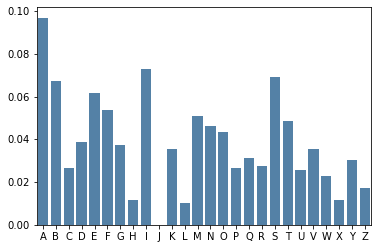

In [97]:
from seaborn import barplot

with open('pride-prejudice-chapter-01.txt') as f:
    plaintext = f.read()

ciphertext = bifid( plaintext, 'Jane Austen' )
labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
values = character_frequency( ciphertext )

barplot(labels, values, color='steelblue');

When considering the bar chart, (ignoring the lack of a `J`) how does this chart compare to other ciphers we've studied in this course?
* [A] Most similar to the Multiplicative cipher
* [B] Most similar to the Autokey Cipher
* [C] Most similar to the Vigenere Cipher
* [D] Most similar to the Affine Cipher
* [E] Not like any other cipher we've seen

Replace the `...` with the letter of your answer. Use the box below to provide any written explanation to support your answer.

In [ ]:
# Your answer should be one of the following strings 'A', 'B', 'C', 'D', 'E'
analysis_q1 = '...'

*click into this box and type your written explanation*

## Part B: Index of Coincidence (2 pts)

The index of coincidence for this passage is:

In [98]:
index_of_coincidence( ciphertext )

0.05077330435846677

When considering the index of coincidence, how does this value compare to other ciphers we've studied in this course?
* [A] Similar to a polyalphabetic cipher, but a little smaller than usual
* [B] Similar to a polyalphabetic cipher, but a little larger than usual
* [C] Similar to a monoalphabetic cipher, but a little smaller than usual
* [D] Similar to a monoalphabetic cipher, but a little larger than usual
* [E] Not like any other cipher we've seen

Replace the `...` with the letter of your answer. Use the box below to provide any written explanation to support your answer.

In [ ]:
# Your answer should be one of the following strings 'A', 'B', 'C', 'D', 'E'
analysis_q2 = '...'

*click into this box and type your written explanation*

## Part C: Number of Possible Keys (2 pts)

Given the criteria for the key (the key is the 5x5 Polybius square, not the key word used to help generate it), how many possible keys are there for this cipher? You can calculate your answer if you'd like (e.g. `analysis_q3 = 3 * 5`) instead of provided a pre-computed answer ( `analysis_q3 = 15` ). Your answer should compute to be an integer. Use the box below to provide any written explanation to support your answer.

In [ ]:
# Your answer should be an integer
analysis_q3 = ...

*click into this box and type your written explanation*

# Submitting Your Work

1. Save this notebook using the save icon
2. In the File Browser to the left, right click on this file (`spring2020-final-bifid.ipynb`) and download it to your computer as a `.ipynb` file
3. Submit the `spring2020-final-bifid.ipynb` file to Gradescope via the Canvas Assignment.